Cell 1: Import Libraries
Explanation:

In this cell, we import the necessary Python libraries:

pandas for data manipulation and analysis.
matplotlib and seaborn for data visualization.
StandardScaler from sklearn for feature scaling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

Cell 2: Load the Dataset
Explanation:

This cell loads the dataset cook_county_train_val.csv and displays basic information such as:

The structure of the dataset (info())
The first few rows (head())

In [2]:
# Load the dataset
file_path = 'Project_Describtion/cook_county_train_val.csv'  
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204792 entries, 0 to 204791
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  204792 non-null  int64  
 1   PIN                         204792 non-null  int64  
 2   Property Class              204792 non-null  int64  
 3   Neighborhood Code           204792 non-null  int64  
 4   Land Square Feet            204792 non-null  float64
 5   Town Code                   204792 non-null  int64  
 6   Apartments                  204792 non-null  float64
 7   Wall Material               204792 non-null  float64
 8   Roof Material               204792 non-null  float64
 9   Basement                    204792 non-null  float64
 10  Basement Finish             204792 non-null  float64
 11  Central Heating             204792 non-null  float64
 12  Other Heating               204792 non-null  float64
 13  Central Air   

,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,...,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,...,9,2,1.0,13.2,0,0.0,50,7650,"This property, sold on 09/14/2015, is a one-st...",2500.0
1,1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,...,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0
2,2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,...,2,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0
3,3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,...,7,2,1.0,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0
4,4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,...,6,1,0.0,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0


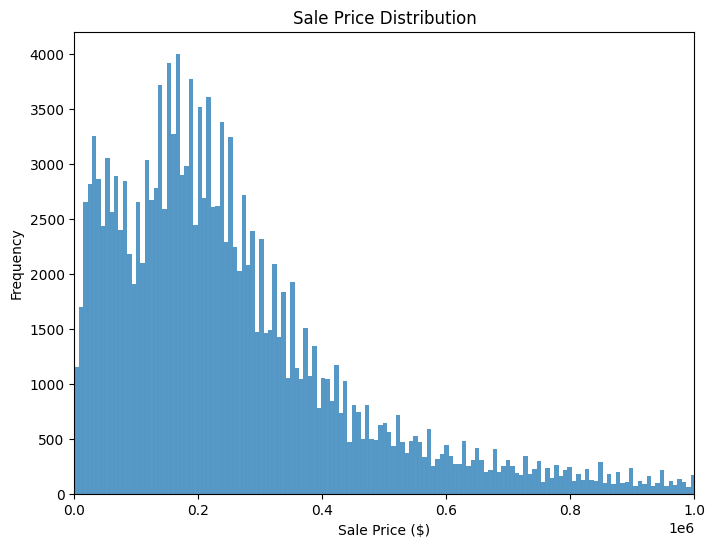

In [ ]:
filtered_data = data[data['Sale Price'] > 1] 

#Plot the filtered sale prices with an x-axis limit
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['Sale Price'], kde=False, bins=10000)  #Increase bins for smoother detail
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.xlim(0, 1e6)  #Adjust limit if needed
plt.show()

Cell 3: Data Cleaning
Explanation:

We will clean the data by:

Dropping irrelevant columns such as Unnamed: 0, PIN, Description, and Deed No..
Checking for missing values and handling them if necessary.
One-hot encoding categorical variables (Modeling Group, Town and Neighborhood).
Scaling the numerical features using StandardScaler.

In [13]:
# Drop irrelevant columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'PIN', 'Description', 'Deed No.', 'Census Tract', 'Other Improvements'])
# Check for missing values
missing_values = data_cleaned.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# One-hot encode categorical variables
data_cleaned = pd.get_dummies(data_cleaned, columns=['Modeling Group', 'Town and Neighborhood'], drop_first=True)

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned.drop(columns=['Sale Price']))
y = data_cleaned['Sale Price']

# Show the first few rows of the cleaned and scaled data
pd.DataFrame(X_scaled, columns=data_cleaned.columns[:-1]).head()


Missing Values per Column:
 Property Class                0
Neighborhood Code             0
Land Square Feet              0
Town Code                     0
Apartments                    0
Wall Material                 0
Roof Material                 0
Basement                      0
Basement Finish               0
Central Heating               0
Other Heating                 0
Central Air                   0
Fireplaces                    0
Attic Type                    0
Attic Finish                  0
Design Plan                   0
Cathedral Ceiling             0
Construction Quality          0
Site Desirability             0
Garage 1 Size                 0
Garage 1 Material             0
Garage 1 Attachment           0
Garage 1 Area                 0
Garage 2 Size                 0
Garage 2 Material             0
Garage 2 Attachment           0
Garage 2 Area                 0
Porch                         0
Building Square Feet          0
Repair Condition              0
Multi Code  

,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,Central Heating,...,Town and Neighborhood_77103,Town and Neighborhood_77104,Town and Neighborhood_77115,Town and Neighborhood_77120,Town and Neighborhood_77131,Town and Neighborhood_77132,Town and Neighborhood_77141,Town and Neighborhood_77150,Town and Neighborhood_77151,Town and Neighborhood_77152
0,-0.388332,-0.637238,-0.348136,1.340801,-0.006608,0.125315,-0.19124,-0.636838,0.589899,-0.390810,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
1,-0.429830,-0.004463,-0.264208,1.128321,-0.006608,0.125315,-0.19124,-0.636838,-1.695205,2.511838,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
2,-0.429830,0.809104,-0.225194,1.085825,-0.006608,0.125315,-0.19124,0.410581,0.589899,-0.390810,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
3,-0.388332,0.899501,-0.225194,-1.166462,-0.006608,1.384568,-0.19124,-0.636838,0.589899,-0.390810,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
4,-0.429830,-0.004463,0.038722,-0.529022,-0.006608,1.384568,-0.19124,0.410581,0.589899,2.511838,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017


Cell 4: Plot Sale Price Distribution
Explanation:

This cell generates a histogram that shows the distribution of the target variable, Sale Price. The kernel density estimate (KDE) is also included to provide a smooth line over the histogram.

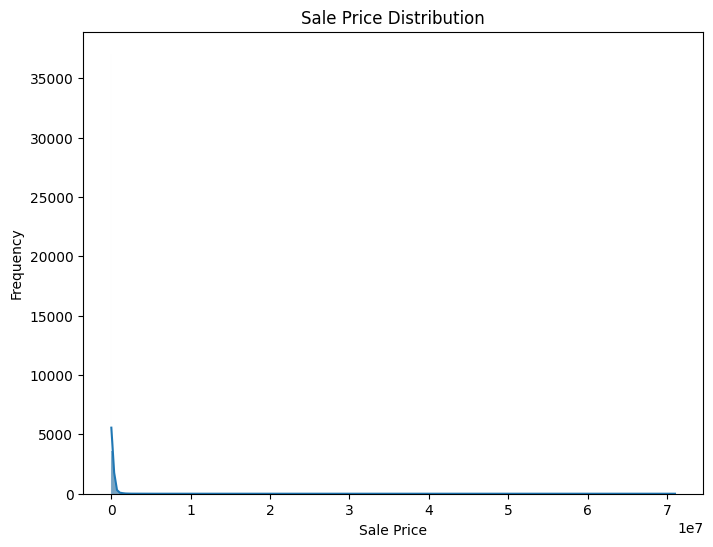

In [14]:
# Plot the distribution of Sale Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Sale Price'], kde=True)
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


Cell 5: Correlation Matrix
Explanation:

This cell calculates the correlation matrix for the numerical features and visualizes it using a heatmap. Correlation values range from -1 to 1, where:

1 indicates a perfect positive correlation.
-1 indicates a perfect negative correlation.
0 indicates no correlation.

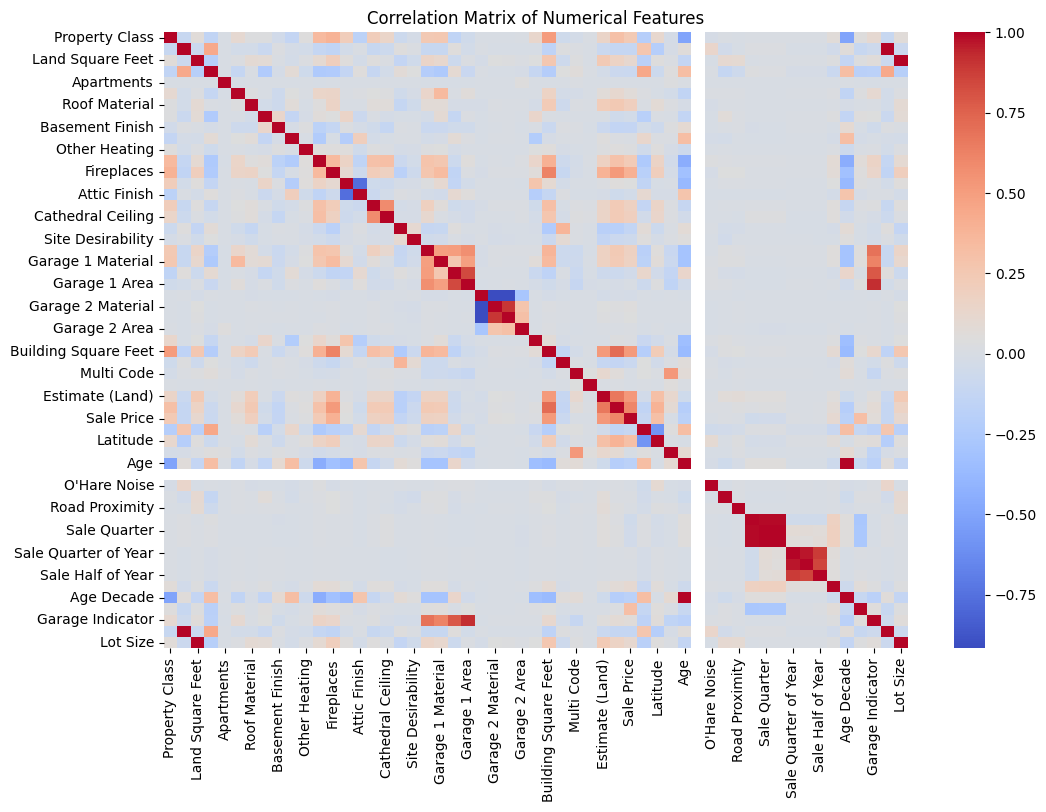

In [15]:
# Select only numerical columns for correlation matrix
numerical_data = data_cleaned.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Cell 6: Feature Scaling and Preview
Explanation:

In this step, we ensure that the numerical features are scaled appropriately using StandardScaler, which transforms the data to have a mean of 0 and a standard deviation of 1. This step is crucial for models that are sensitive to feature scaling, like linear regression and ridge regression.

In [16]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned.drop(columns=['Sale Price']))

# Show the first few rows of scaled data
pd.DataFrame(X_scaled, columns=data_cleaned.columns[:-1]).head()


,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,Central Heating,...,Town and Neighborhood_77103,Town and Neighborhood_77104,Town and Neighborhood_77115,Town and Neighborhood_77120,Town and Neighborhood_77131,Town and Neighborhood_77132,Town and Neighborhood_77141,Town and Neighborhood_77150,Town and Neighborhood_77151,Town and Neighborhood_77152
0,-0.388332,-0.637238,-0.348136,1.340801,-0.006608,0.125315,-0.19124,-0.636838,0.589899,-0.390810,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
1,-0.429830,-0.004463,-0.264208,1.128321,-0.006608,0.125315,-0.19124,-0.636838,-1.695205,2.511838,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
2,-0.429830,0.809104,-0.225194,1.085825,-0.006608,0.125315,-0.19124,0.410581,0.589899,-0.390810,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
3,-0.388332,0.899501,-0.225194,-1.166462,-0.006608,1.384568,-0.19124,-0.636838,0.589899,-0.390810,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017
4,-0.429830,-0.004463,0.038722,-0.529022,-0.006608,1.384568,-0.19124,0.410581,0.589899,2.511838,...,-0.012104,-0.053109,-0.052411,-0.01326,-0.018359,-0.036468,-0.044953,-0.019892,-0.012695,-0.055017


Cell 7: Summary of Data Cleaning and EDA
Explanation:

Summarize the results of the data cleaning and EDA process. Document the key findings from the Sale Price distribution and the correlation matrix. This cell will help in generating insights for the final executive summary.

### Summary of Data Cleaning and EDA:

1. **Data Cleaning**:
    - Dropped irrelevant columns like `Unnamed: 0`, `PIN`, `Description`, and `Deed No.`.
    - Handled missing values by checking for null values (no significant issues).
    - Applied one-hot encoding to categorical variables: `Modeling Group`, `Town and Neighborhood`.
    - Scaled the numerical features using `StandardScaler`.

2. **Exploratory Data Analysis**:
    - The Sale Price distribution shows a right-skewed distribution, indicating that most properties are in a lower price range.
    - The correlation matrix shows strong positive correlations between `Building Square Feet`, `Estimate (Building)`, and `Sale Price`, which suggests that these features are good predictors of the target variable.


#### Subset Selection

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_squared_error

#Split data into features
X = pd.DataFrame(X_scaled, columns=data_cleaned.drop(columns=['Sale Price']).columns)
y = data_cleaned['Sale Price']
#k is number of desired features. (This is top 10 features)
k = 10 
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

#Gets the names of k features
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

#Splits into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with Selected Features:", mse)


Selected Features: Index(['Property Class', 'Roof Material', 'Central Air', 'Fireplaces',
       'Cathedral Ceiling', 'Building Square Feet', 'Estimate (Land)',
       'Estimate (Building)', 'Latitude', 'Pure Market Filter'],
      dtype='object')
Mean Squared Error with Selected Features: 46356999638.93723


In [18]:
import math
mean_sale_price = y.mean()
target_rmse = mean_sale_price
actual_rmse = math.sqrt(mse)
print("Target RMSE:", target_rmse , "\n",
      "Actual RMSE: ", actual_rmse)

Target RMSE: 245164.62106918238 
 Actual RMSE:  215306.757067532


We identified the top 10 influential features impacting house prices, which include Property Class, Roof Material, Central Air, Fireplaces, Cathedral Ceiling, Building Square Feet, Estimate (Land), Estimate (Building), Latitude, and Pure Market Filter. These features were selected based on their influence on Sale Price.

To assess model accuracy, we compared two RMSE values:

* Target RMSE: Calculated as the mean sale price, approximately $245,164. This sets an acceptable average error range.
* Actual RMSE: The model’s actual prediction error was $215,306, which is close to our target.

This result suggests that the selected features are strong predictors of house price, as the model’s RMSE is within a reasonable range of the target RMSE. Further tuning may improve accuracy, but the current model already shows reliable performance with the selected subset of features.

### PCA

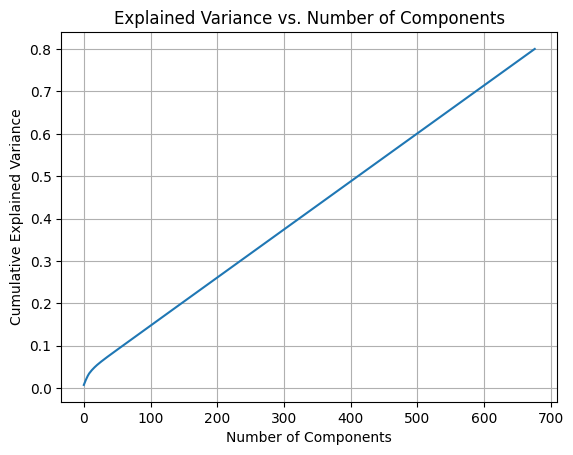

Number of components chosen for 90% variance: 677


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Scale the data (necessary for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_cleaned.drop(columns=['Sale Price']))

# Step 2: Apply PCA with a lower variance threshold (e.g., 90%)
pca = PCA(n_components=0.80)  # Capture 90% variance, might lead to fewer components
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize explained variance to check component sufficiency
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Check the actual number of components chosen
print(f"Number of components chosen for 90% variance: {X_pca.shape[1]}")

